# 03_train_model.ipynb

# Step 1: Import Libraries

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Cleaned Data


In [19]:
df = pd.read_csv("../data/cleaned_train.csv")
# Drop rows where 'clean_text' is NaN
df = df.dropna(subset=['clean_text'])

# Step 3: Split Data into Train/Test


In [20]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42)

# Step 4: Text Vectorization with TF-IDF


In [21]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 5: Define Models and Parameters for Hyperparameter Tuning

In [22]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "MultinomialNB": MultinomialNB()
}

params = {
    "Logistic Regression": {'C': [0.01, 0.1, 1, 10]},
    "Random Forest": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    "MultinomialNB": {'alpha': [0.1, 0.5, 1.0]}
}

best_models = {}

# Step 6: Hyperparameter Tuning with GridSearchCV


In [23]:
for model_name in models:
    print(f"Tuning hyperparameters for {model_name}...")
    grid = GridSearchCV(models[model_name], params[model_name], cv=5, scoring='accuracy')
    grid.fit(X_train_tfidf, y_train)
    best_models[model_name] = grid.best_estimator_
    print(f"Best parameters for {model_name}: {grid.best_params_}")

Tuning hyperparameters for Logistic Regression...
Best parameters for Logistic Regression: {'C': 10}
Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 200}
Tuning hyperparameters for MultinomialNB...
Best parameters for MultinomialNB: {'alpha': 0.1}


# Step 7: Evaluate Best Models



Evaluating Logistic Regression...
Model Accuracy (Logistic Regression): 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2080
           1       0.94      0.95      0.94      2048

    accuracy                           0.94      4128
   macro avg       0.94      0.94      0.94      4128
weighted avg       0.94      0.94      0.94      4128



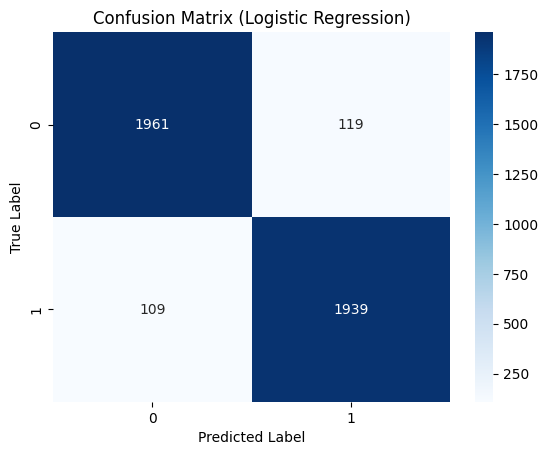


Evaluating Random Forest...
Model Accuracy (Random Forest): 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2080
           1       0.94      0.94      0.94      2048

    accuracy                           0.94      4128
   macro avg       0.94      0.94      0.94      4128
weighted avg       0.94      0.94      0.94      4128



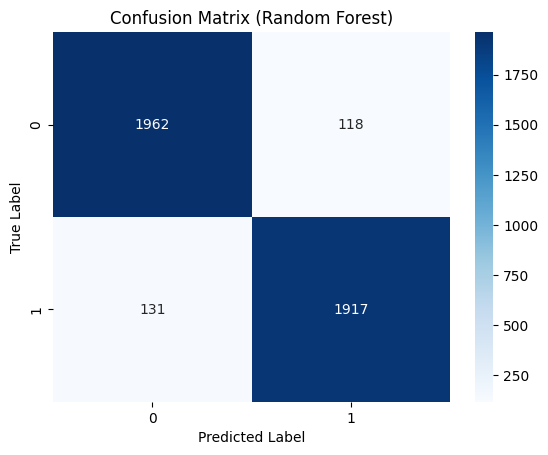


Evaluating MultinomialNB...
Model Accuracy (MultinomialNB): 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      2080
           1       0.90      0.84      0.87      2048

    accuracy                           0.88      4128
   macro avg       0.88      0.88      0.88      4128
weighted avg       0.88      0.88      0.88      4128



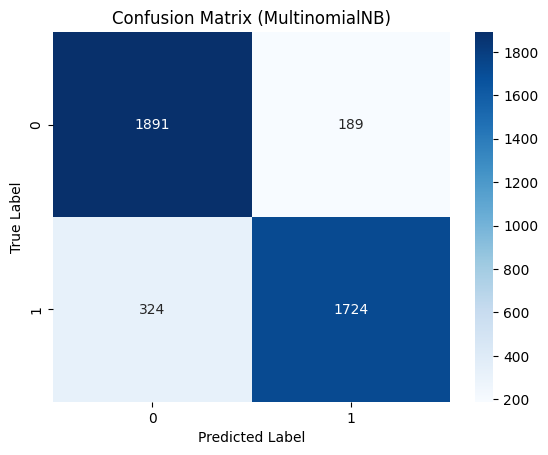

In [26]:
for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name}...")
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy ({model_name}): {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.show()

# Step 8: Save Best Model (Example: Logistic Regression)


In [25]:
joblib.dump(best_models['Logistic Regression'], '../models/best_logistic_model.pkl')
joblib.dump(vectorizer, '../models/tfidf_vectorizer.pkl')

['../models/tfidf_vectorizer.pkl']